In [23]:
# This module implements a common interface to many different secure hash and message digest algorithms.
import hashlib

In [43]:
# test1 in sha3_s56 algorithm
test1 = hashlib.sha3_256()

# Update the hash object with the string arg
test1.update(b'This is just a test string')

# Return the digest of the strings passed to the update() method so far. 
# This is a string of digest_size bytes which may contain non-ASCII characters, including null bytes.
test1.digest()

# Like digest() except the digest is returned as a string of double length, containing only hexadecimal digits. 
# This may be used to exchange the value safely in email or other non-binary environments.
test1.hexdigest()

'cdc27e92b6f2567e94fa6d48448694b0d547ec91c0f869e103a5cd7ca5b77019'

In [25]:
test2 = hashlib.sha3_256()
test2.update(b'This is just a test string of strings')
test2.digest()
test2.hexdigest()

'a1f34fe4ada237379aee8b5ed8b694a8d12a48c48b6e352c6f9ee1b2e020c182'

In [26]:
# test block containing transactions
t_block = {
    'transaction' : [ 
        {
            'from' : 'johnny',
            'to' : 'frankie',
            'amount' : 20,
            'message' : "Don't worry about it."
            
        },
        {
            'from' : 'mark',
            'to' : 'luke',
            'amount' : 2057,
            'message' : 'xmas gift'
            
        },
        {
            'from' : 'yoda',
            'to' : 'han',
            'amount' : 267839,
            'message' : 'For the bounty'
            
        },
        
    ]
    
}


In [27]:
# The test block is not yet converted into byte format
t_block

{'transaction': [{'amount': 20,
   'from': 'johnny',
   'message': "Don't worry about it.",
   'to': 'frankie'},
  {'amount': 2057, 'from': 'mark', 'message': 'xmas gift', 'to': 'luke'},
  {'amount': 267839,
   'from': 'yoda',
   'message': 'For the bounty',
   'to': 'han'}]}

### to convert the t_block into byte you must import pickle

### What is pickle?

### The pickle module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.


In [28]:
# import pickle module
import pickle

In [29]:
# Return the pickled representation of the object as a bytes object, instead of writing it to a file.
pickle.dumps(t_block)

b"\x80\x03}q\x00X\x0b\x00\x00\x00transactionq\x01]q\x02(}q\x03(X\x04\x00\x00\x00fromq\x04X\x06\x00\x00\x00johnnyq\x05X\x02\x00\x00\x00toq\x06X\x07\x00\x00\x00frankieq\x07X\x06\x00\x00\x00amountq\x08K\x14X\x07\x00\x00\x00messageq\tX\x15\x00\x00\x00Don't worry about it.q\nu}q\x0b(h\x04X\x04\x00\x00\x00markq\x0ch\x06X\x04\x00\x00\x00lukeq\rh\x08M\t\x08h\tX\t\x00\x00\x00xmas giftq\x0eu}q\x0f(h\x04X\x04\x00\x00\x00yodaq\x10h\x06X\x03\x00\x00\x00hanq\x11h\x08J?\x16\x04\x00h\tX\x0e\x00\x00\x00For the bountyq\x12ues."

In [30]:
# block test hash

btest = hashlib.sha3_256()
btest.update(pickle.dumps(t_block))
btest.digest()
btest.hexdigest()

'add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e'

In [31]:
# test block containing transactions
t_block2 = {
    'transaction' : [ 
        {
            'from' : 'johnny',
            'to' : 'frankie',
            'amount' : 20257849,
            'message' : "Don't worry about it."
            
        },
        {
            'from' : 'mark',
            'to' : 'luke',
            'amount' : 2057,
            'message' : 'xmas gift'
            
        },
        {
            'from' : 'yoda',
            'to' : 'han',
            'amount' : 267839,
            'message' : 'For the bounty'
            
        },
        
    ]
    
}

In [32]:
# blockchain test2 using a nefarious input

nefarious  = hashlib.sha3_256()
nefarious.update(pickle.dumps(t_block2))
nefarious.digest()
nefarious.hexdigest()

'fd59d4c36471879af7de3af96681fb0aa868a520f267e842dedd6e91bc4dc661'

### Now within the blockchain providing the hash is a fast and efficent way to check all commits to the ledger. This adds both confidence and security to the community of cryptocurrency.

### Let's see how this compares to many nodes confirming the list and then try and add our nefarious test(t_block2).

### You will be able to see that when quickly comparing a honest hash signatures to a nefarious hash signature, the hash is easliy distinguishable.

In [33]:
# This simulates the 'honest blockchain' data
print(btest.hexdigest())
print(btest.hexdigest())
print(btest.hexdigest())
print(btest.hexdigest())
print(btest.hexdigest())
print(btest.hexdigest())
print(btest.hexdigest())

# this simulates someone trying to change the blockchain values for personal gain.
# as you can see, the last entry in the block looks 'fishy'
print(nefarious.hexdigest())


add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e
fd59d4c36471879af7de3af96681fb0aa868a520f267e842dedd6e91bc4dc661


In [34]:
top_block = {
    'transaction' : [ 
        {
            'from' : 'johnny',
            'to' : 'frankie',
            'amount' : 20257849,
            'message' : "Don't worry about it."
            
        },
        {
            'from' : 'mark',
            'to' : 'luke',
            'amount' : 2057,
            'message' : 'xmas gift'
            
        },
        {
            'from' : 'yoda',
            'to' : 'han',
            'amount' : 267839,
            'message' : 'For the bounty'
            
        },
        
    ],
    'last_block' : btest.hexdigest(),
    'nonce' : 0
    
}

In [35]:
top_block

{'last_block': 'add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e',
 'nonce': 0,
 'transaction': [{'amount': 20257849,
   'from': 'johnny',
   'message': "Don't worry about it.",
   'to': 'frankie'},
  {'amount': 2057, 'from': 'mark', 'message': 'xmas gift', 'to': 'luke'},
  {'amount': 267839,
   'from': 'yoda',
   'message': 'For the bounty',
   'to': 'han'}]}

In [36]:
# hashing the top block with the last transaction appended to the blockchain
tb = hashlib.sha3_256()
tb.update(pickle.dumps(top_block))
tb.digest()
tb.hexdigest()

'7086dfe8e832c6731b57ced77da4050a1a876b79fe449ae45aa037a0e4bddf28'

### This next section will briefly explain 'proof of work'. In bitcoin this is a way that the miners are used in solving these complex algorithms for a prize(i.e. a bitcoin).

### What proof of work does is basically present a challenge... and the answer is unknown, nobody knows what the answer is. The parameter to check the answer to the challenge is very simple and if you get the answer you will be rewarded.  This is where a 'nonce' is used.

### In cryptography, a nonce is an arbitrary number that can only be used once. It is similar in spirit to a nonce word, hence the name. It is often a random or pseudo-random number issued in an authentication protocol to ensure that old communications cannot be reused in replay attacks. They can also be useful as initialization vectors and in cryptographic hash functions.

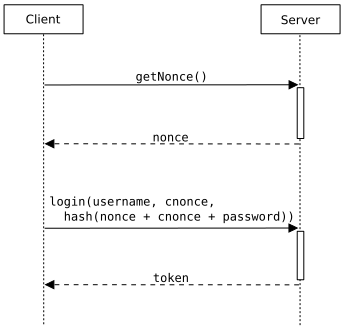


### There is absolutely no way to predict the answer, much like trying to produce two identical hash signatures. This is a way to prevent any false information to be injected into a blockchain and predetermining the hash signature.


In [37]:
# this is the actual difficulty
# https://bitcoinwisdom.com/bitcoin/difficulty

# difficulty of 1 which is arbitrary for our test( this can be dynamically changed)
difficulty = 1

# This serves as the challenge miners are trying to solve.
challenge_string = ''.join(['0' for x in range(difficulty)])


In [38]:
# The system only accepts an answer that prepends with the challenge_string
# in this case the hash signature must lead with a  single '0' (zero)

print('The hash signature we are seeking must lead with: {}'.format(challenge_string))

The hash signature we are seeking must lead with: 0


### So to ensure the last entry in the blockchain is valid it must have this unique nonce.

### Here is an example of how mining works

In [39]:
# set the nonce
nonce = 1

top_block['nonce'] = 1
miner = hashlib.sha3_256()
while miner.hexdigest()[:difficulty] != challenge_string:
    nonce += 1
    top_block['nonce'] = nonce
    miner = hashlib.sha3_256()
    miner.update(pickle.dumps(top_block))
    print(nonce, miner.hexdigest())

2 b4efe97c52919f17309cdf418aa88fbc79dba8f38692c46517035b5dd35532f8
3 3c3703be8c16f194c661a09baf9c94c903c47554f6f5bcc0c61d43931025db57
4 35ad7b6347d46b436c38a24b4d11f2cbfade9607345de28d4747afe79357256c
5 29c3a17e1a0eb60f55d811d73dfaf5fb9e15146e644b7a9bc51285508e26ef55
6 69663e26b7dd7aeaa66f6d5ccb8e9533f89bf29eed05367bdf957d1fd932f9d4
7 19475e8feac64591197af7ee564520b9589301d19375cfe7dfd0513b19afe7a2
8 d9ca367f1d5f7e9aa88cfb29d0fa35de9a4e6ed657c52945b969a9810a1ed851
9 ca3774f20b390c382fe3b072612d9a9562b6d1ec894c3203bfca8cbd02c7ae4a
10 158e91c630e756d579604a2a5bac749c0bec3ce192e26ab4088dc1b4c6ccf4ca
11 5530a4bfc3e6f7c28207ae48d7fd84fc55c82cda306541d70118f9499dd0e49f
12 2cc545e02ba4efedd944afa0dfc96ddb66965adfa83656f428b87a39787a35fa
13 513d51096336475d68b926c9dcfb3c7e9606c9c7eb19f1e5382df971b83c58b1
14 cc6eb03bee9d85ce628e49dd8520b0148d3df8838f00adc5a591d7c590761d7e
15 3f3ba1e9dfd1255a09eee0289d30101d8f5d52022b08c034bf7178966763675a
16 ec252d9ea475872872cc46676001d669c36d630554aee398292d7

In [40]:
# print the top_block here
top_block

{'last_block': 'add2abf44f95512a8d13c58178b59656db2ffc235da1b66e7335e1e5845c8d8e',
 'nonce': 26,
 'transaction': [{'amount': 20257849,
   'from': 'johnny',
   'message': "Don't worry about it.",
   'to': 'frankie'},
  {'amount': 2057, 'from': 'mark', 'message': 'xmas gift', 'to': 'luke'},
  {'amount': 267839,
   'from': 'yoda',
   'message': 'For the bounty',
   'to': 'han'}]}